In [3]:
import numpy as np
from Code.toolbox import compare_freq
import matplotlib.pyplot as plt

In [4]:
def load_(path):
    data = np.load(path)
    signals, labels = data[:, :1000], data[:, 1000:]
    return signals, labels

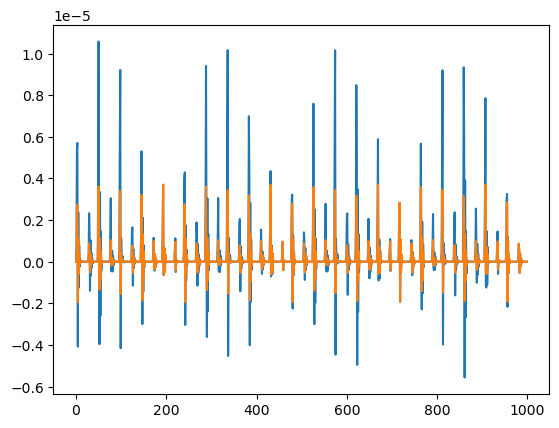

In [5]:
signals_NoRR, labels_NoRR = load_('../../Data/RemoveRR/sim_5000_0_90_140_train_NoRR.npy')
signals_RR, labels_RR = load_('../../Data/RemoveRR/sim_5000_0_90_140_train_RR.npy')
plt.plot(signals_RR[0])
plt.plot(signals_NoRR[0])

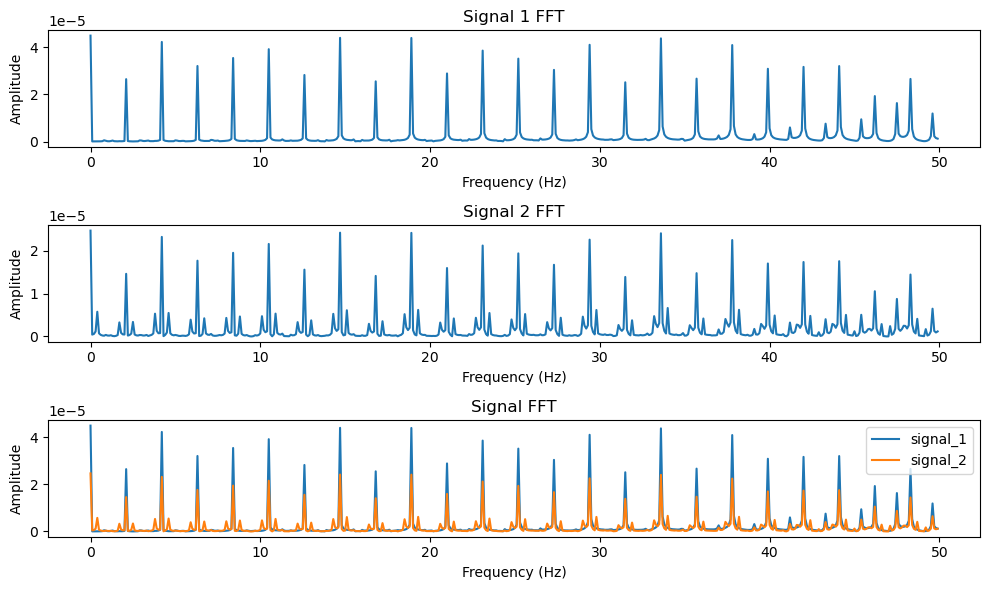

3.8333333333333335

In [6]:
idx = 0

rr = labels_NoRR[idx, 3]
orig_scg = signals_NoRR[idx] / 0.00001

x_space = np.linspace(0,1,1000)
seg_fre = rr / (60/10)

seg_amp = max(orig_scg) * 0.00001
# rr_component = np.sin(2 * np.pi * seg_fre * x_space)
rr_component = np.cos(2 * np.pi * seg_fre * x_space)

scg_manual = orig_scg * (rr_component + 2 ) * seg_amp
scg_sim = signals_RR[idx] * 0.1

# cos(θ) = (e^(jθ) + e^(-jθ)) / 2
# x[n] * cos(θ) = ( x[n] * e^(jθ) + x[n] * e^(-jθ) ) / 2
# DFT{x[n]} -> X[k]
# X[k] = Σ (x[n] * e^(-j * 2π * k * n / N))

# DFT{x[n] * cos(θ)} * 2 = DFT{x[n] * e^(jθ)} + DFT{x[n] * e^(-jθ)}
# = Σ (x[n] * e^(-j * 2π * k * n / N) * e^(jθ)) +  Σ (x[n] * e^(-j * 2π * k * n / N) * e^(-jθ))
# θ = 2π * freq
# = x[n] * Σ ( e^(-j*2π*(k * n / N - freq)) + e^(-j*2π*(k * n / N + freq)))

compare_freq(orig_scg * seg_amp, scg_sim)
seg_fre

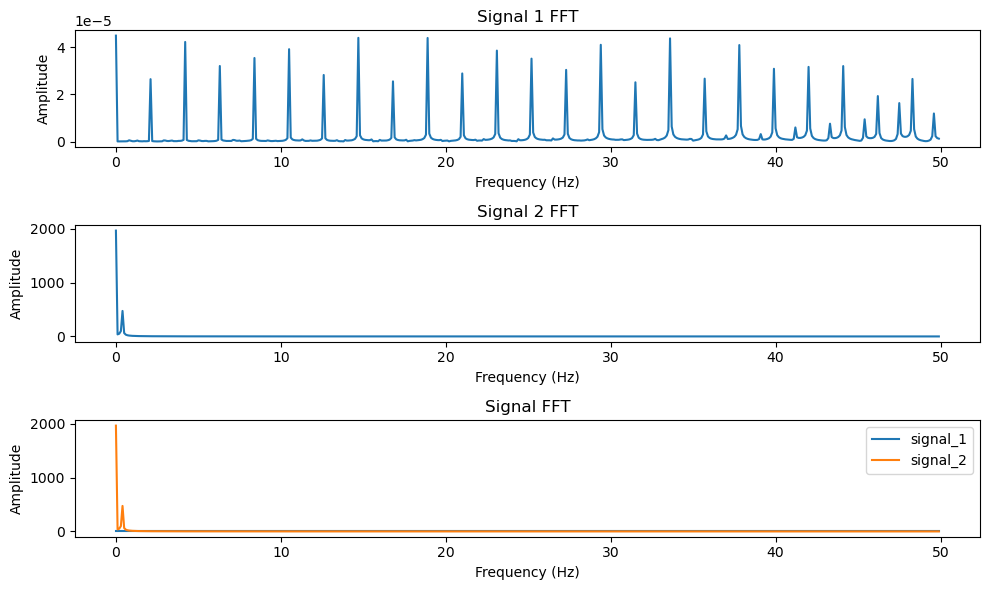

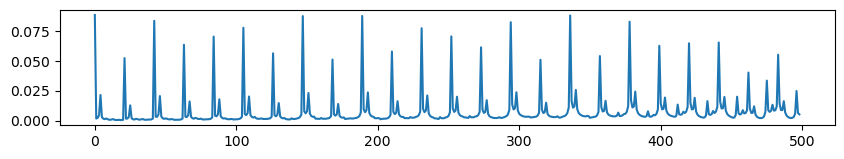

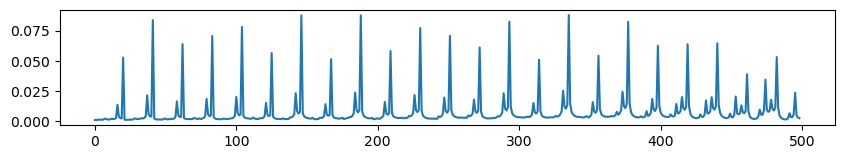

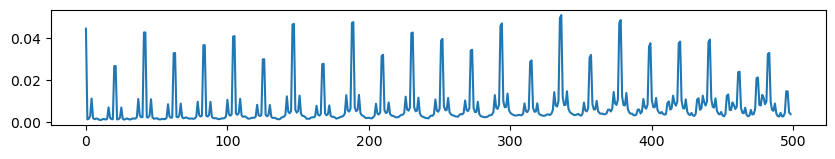

In [7]:
sign1 = orig_scg * seg_amp
sign2 = rr_component + 2
sample_rate = 100
fft1 = np.fft.fft(sign1)
fft2 = np.fft.fft(sign2)

# 计算频率轴
n = len(sign1)
freq = np.fft.fftfreq(n, d=1 / sample_rate)

# 仅保留正半轴的频谱
positive_freq_indices = np.where(freq >= 0)
positive_freq = freq[positive_freq_indices]
positive_fft1 = np.abs(fft1[positive_freq_indices])
positive_fft2 = np.abs(fft2[positive_freq_indices])


# 绘制FFT结果
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.title("Signal 1 FFT")
plt.plot(positive_freq, np.abs(positive_fft1))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 2)
plt.title("Signal 2 FFT")
plt.plot(positive_freq, np.abs(positive_fft2))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 3)
plt.title("Signal FFT")
plt.plot(positive_freq, np.abs(positive_fft1), label='signal_1')
plt.plot(positive_freq, np.abs(positive_fft2), label='signal_2')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()

convolution_result_r = np.convolve(positive_fft1, positive_fft2, mode='full')

plt.figure(figsize=(10, 1.5))

plt.plot(convolution_result_r[:499])


convolution_result_l = np.convolve(positive_fft1, positive_fft2[::-1], mode='full')

plt.figure(figsize=(10, 1.5))
plt.plot(convolution_result_l[500:])


plt.figure(figsize=(10, 1.5))
plt.plot(0.5 * (convolution_result_l[500:]+convolution_result_r[:499]))

Text(0, 0.5, 'Amplitude')

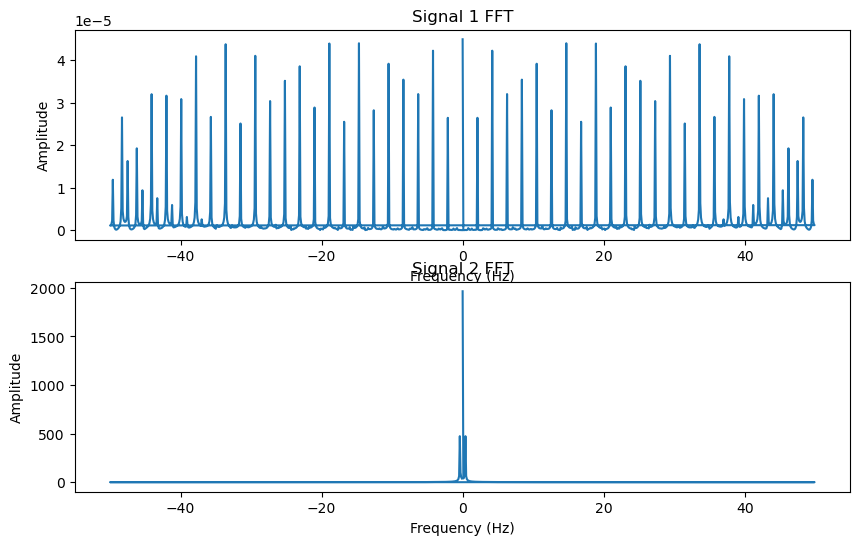

In [10]:
sign1 = orig_scg * seg_amp
sign2 = rr_component + 2
sample_rate = 100
fft1 = np.fft.fft(sign1)
fft2 = np.fft.fft(sign2)

# 计算频率轴
n = len(sign1)
freq = np.fft.fftfreq(n, d=1 / sample_rate)

# 仅保留正半轴的频谱
positive_freq_indices = np.where(freq >= 0)
# positive_freq = freq[positive_freq_indices]
# positive_fft1 = np.abs(fft1[positive_freq_indices])
# positive_fft2 = np.abs(fft2[positive_freq_indices])

fft1_ = np.abs(fft1)
fft2_ = np.abs(fft2)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title("Signal 1 FFT")
plt.plot(freq, np.abs(fft1))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.title("Signal 2 FFT")
plt.plot(freq, np.abs(fft2_))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

In [23]:
seg_fre / (2 * np.pi)

0.6100939485189322

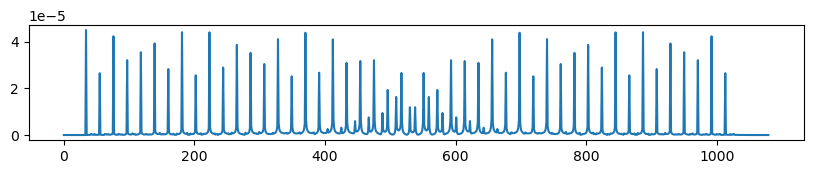

In [25]:

ls_fft = np.pad(fft1_, (34, 46), mode='constant', constant_values=0)
rs_fft = np.pad(fft1_, (46, 34), mode='constant', constant_values=0)
plt.figure(figsize=(10, 1.5))
# plt.plot((ls_fft + rs_fft)[len(ls_fft)//2:])
plt.plot(ls_fft)

In [ ]:
def compare_freq(sign1, sign2, sample_rate=100):
    # 计算信号的FFT
    fft1 = np.fft.fft(sign1)
    fft2 = np.fft.fft(sign2)

    # 计算频率轴
    n = len(sign1)
    freq = np.fft.fftfreq(n, d=1 / sample_rate)

    # 仅保留正半轴的频谱
    positive_freq_indices = np.where(freq >= 0)
    positive_freq = freq[positive_freq_indices]
    positive_fft1 = np.abs(fft1[positive_freq_indices])
    positive_fft2 = np.abs(fft2[positive_freq_indices])

    # 绘制FFT结果
    plt.figure(figsize=(10, 6))
    plt.subplot(3, 1, 1)
    plt.title("Signal 1 FFT")
    plt.plot(positive_freq, np.abs(positive_fft1))
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")

    plt.subplot(3, 1, 2)
    plt.title("Signal 2 FFT")
    plt.plot(positive_freq, np.abs(positive_fft2))
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")

    plt.subplot(3, 1, 3)
    plt.title("Signal FFT")
    plt.plot(positive_freq, np.abs(positive_fft1), label='signal_1')
    plt.plot(positive_freq, np.abs(positive_fft2), label='signal_2')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.tight_layout()
    plt.show()